In [1]:
from datasets import load_dataset
from dotenv import load_dotenv
import transformers

/home/mohamed-stifi/Desktop/intern-at-nia-gen/darija-llm-lab/.darija-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv()

True

In [3]:
dataset = load_dataset("mohamed-stifi/darija-combined-dataset", split='train')

In [4]:
dataset

Dataset({
    features: ['text', 'source'],
    num_rows: 35562
})

In [5]:
dataset['text'][:5]

['من مور شي يومين خرجات سمية من دارها',
 'وبغا يسترجع القوة ديالو',
 'شوية كيقولو لها راه اليوم داير السبوع',
 'ما كانش كيرد عليهم وكان كيزيد يتحمس',
 'بخصوص القضية ديال يوسف قالو له شنو هي']

In [6]:
model_id = 'google/gemma-3n-E2B-it'
current_tokenizer = transformers.AutoTokenizer.from_pretrained(
    model_id, trust_remote_code=True
)

In [7]:
existing_tokens = set(current_tokenizer.vocab.keys())
print(len(existing_tokens))

262400


In [8]:
text = dataset[30000]['text']

print(current_tokenizer.tokenize(text))

['ما', '▁هو', '▁الحد', '▁الأ', 'قص', 'ى', '▁لأ', 'ط', 'ول', '▁فترة', '▁إ', 'ق', 'راض', '▁متا', 'حة', '▁لق', 'روض', 'ك', '▁؟']


In [9]:
len(current_tokenizer.tokenize(text))

19

In [10]:
texts = dataset['text']
len(texts)

35562

In [11]:
number_of_tokens = []
text_lenght = []
for text in texts:
    text_lenght.append(len(text))
    number_of_tokens.append(len(current_tokenizer.tokenize(text)))

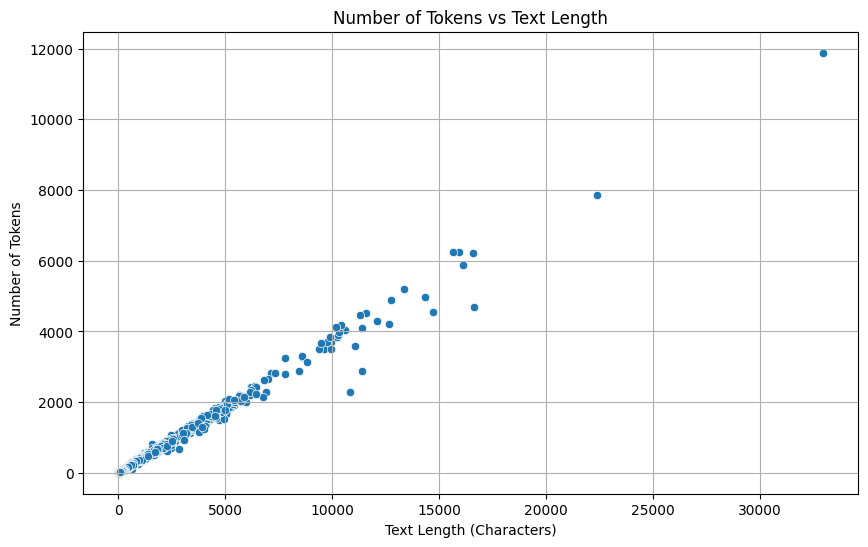

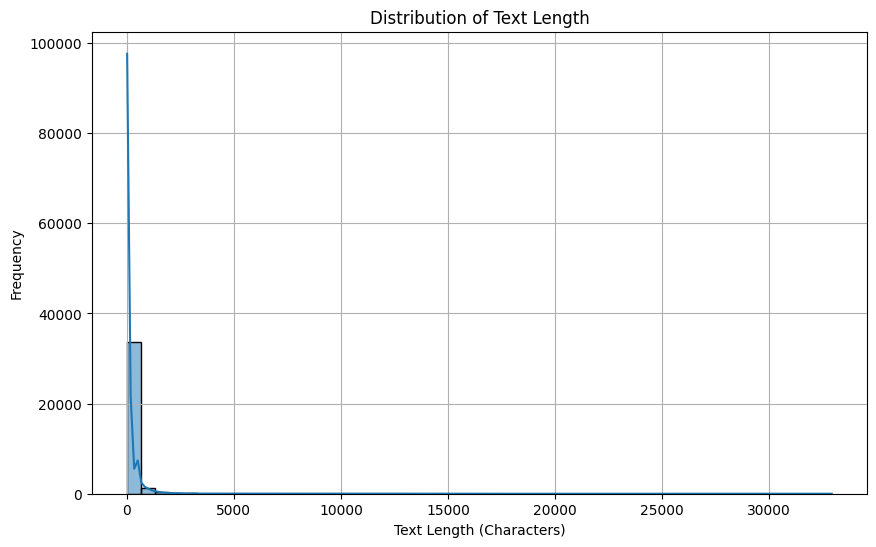

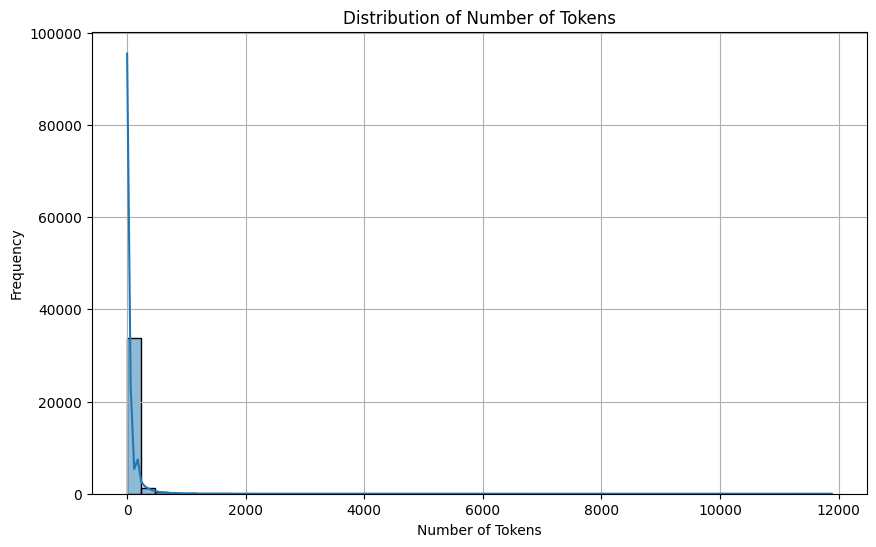

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the lengths are calculated before plotting
# Assuming 'text_lenght' and 'number_of_tokens' lists exist from the preceding code

# Plotting the relationship between text length and number of tokens
plt.figure(figsize=(10, 6))
sns.scatterplot(x=text_lenght, y=number_of_tokens)
plt.title('Number of Tokens vs Text Length')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Number of Tokens')
plt.grid(True)
plt.show()

# Additional plots (histograms for distribution of text length and token count)

# Histogram of Text Length
plt.figure(figsize=(10, 6))
sns.histplot(text_lenght, bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram of Number of Tokens
plt.figure(figsize=(10, 6))
sns.histplot(number_of_tokens, bins=50, kde=True)
plt.title('Distribution of Number of Tokens')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [13]:
words = []
for text in texts:
    words.extend(text.split())

words = set(words)
print(len(words))

117892


In [14]:
voc_size = len(words)//4
print(f"vocabolary size: {voc_size}")
new_tokenizer = current_tokenizer.train_new_from_iterator(texts,voc_size)

vocabolary size: 29473





In [15]:
new_tokenizer.vocab_size

29473

In [16]:
text = dataset[30000]['text']

print(new_tokenizer.tokenize(text))

['ما▁هو▁ال', 'حد', '▁الأقص', 'ى', '▁لأ', 'طول▁', 'فترة▁', 'إق', 'راض', '▁م', 'تاح', 'ة▁ل', 'قرو', 'ض', 'ك▁؟']


In [17]:
len(new_tokenizer.tokenize(text))


15

In [18]:
number_of_tokens = []
text_lenght = []
for text in texts:
    text_lenght.append(len(text))
    number_of_tokens.append(len(new_tokenizer.tokenize(text)))

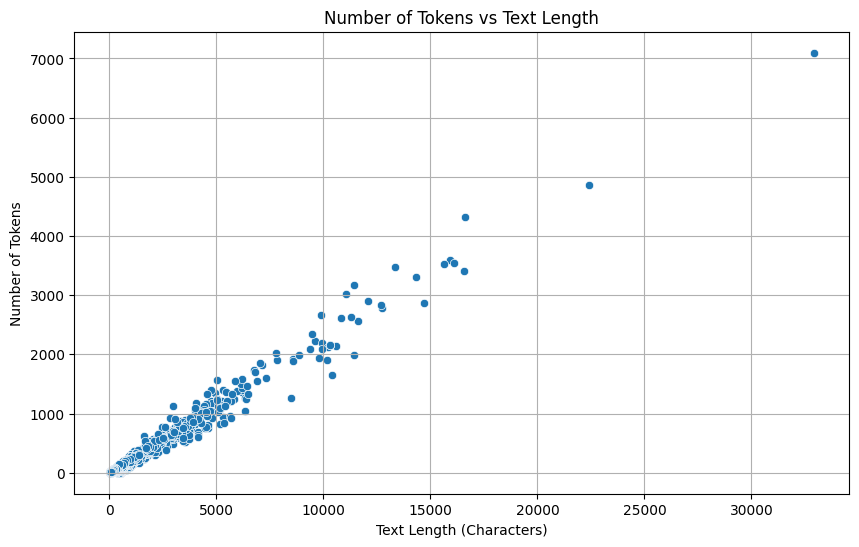

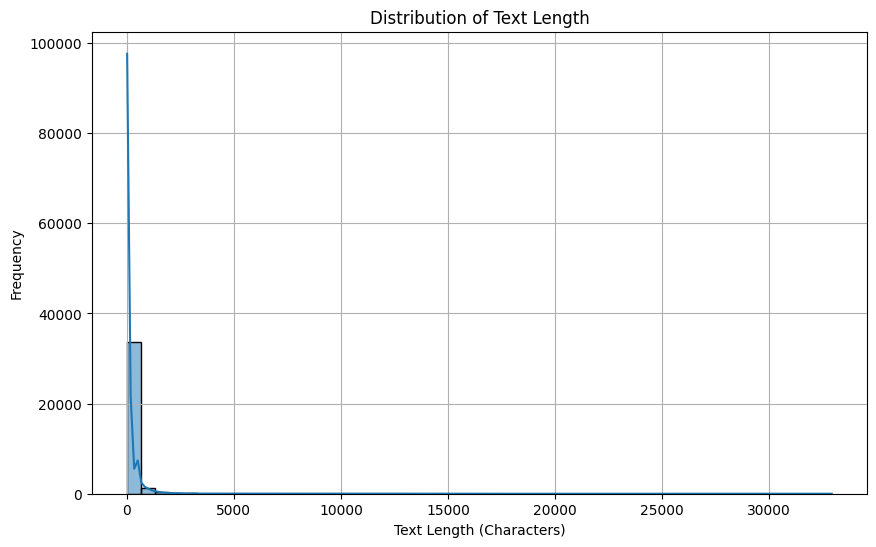

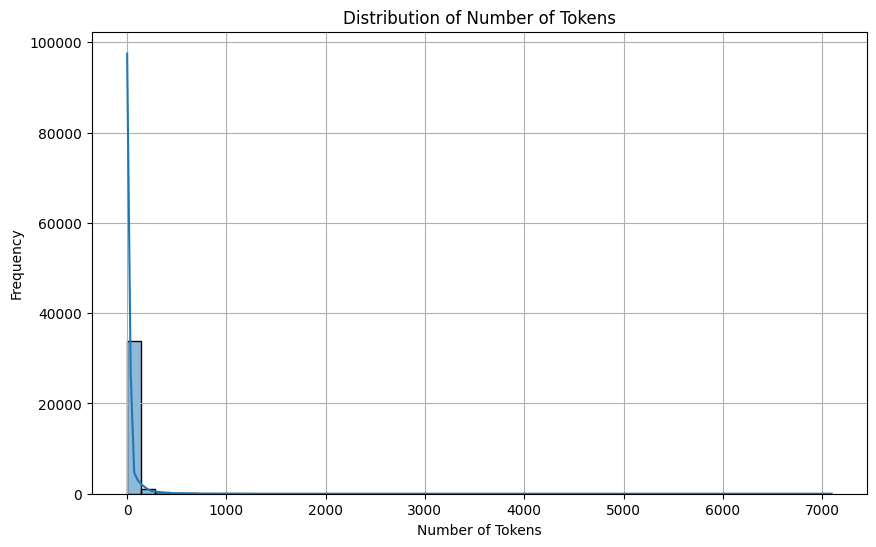

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the lengths are calculated before plotting
# Assuming 'text_lenght' and 'number_of_tokens' lists exist from the preceding code

# Plotting the relationship between text length and number of tokens
plt.figure(figsize=(10, 6))
sns.scatterplot(x=text_lenght, y=number_of_tokens)
plt.title('Number of Tokens vs Text Length')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Number of Tokens')
plt.grid(True)
plt.show()

# Additional plots (histograms for distribution of text length and token count)

# Histogram of Text Length
plt.figure(figsize=(10, 6))
sns.histplot(text_lenght, bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram of Number of Tokens
plt.figure(figsize=(10, 6))
sns.histplot(number_of_tokens, bins=50, kde=True)
plt.title('Distribution of Number of Tokens')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [20]:
existing_tokens_len = []
for token in current_tokenizer.vocab.keys():
    existing_tokens_len.append(len(token))

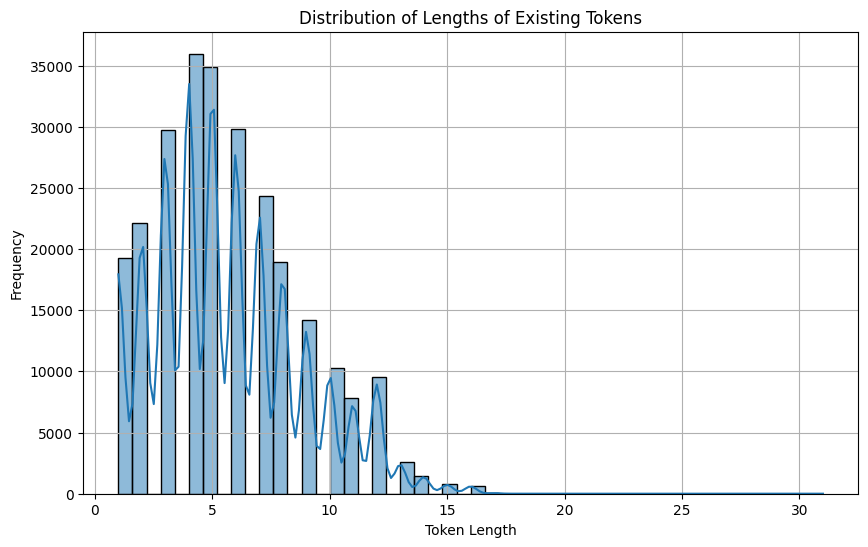

In [21]:
# prompt: plot the ferquences of lenghts in existing_tokens_len

import matplotlib.pyplot as plt
# Plotting the frequencies of lengths of existing tokens
plt.figure(figsize=(10, 6))
sns.histplot(existing_tokens_len, bins=50, kde=True)
plt.title('Distribution of Lengths of Existing Tokens')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
new_token_len = []
for token in new_tokenizer.vocab.keys():
    new_token_len.append(len(token))

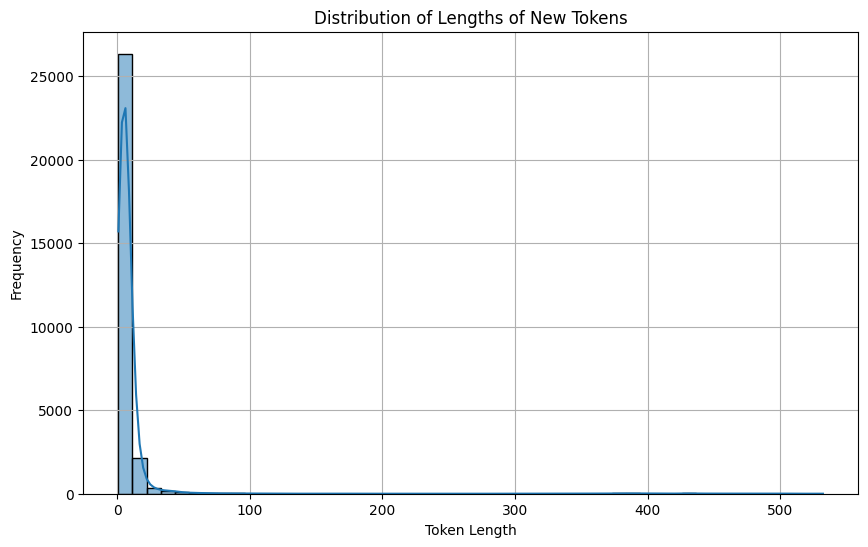

In [23]:
import matplotlib.pyplot as plt
# Plotting the frequencies of lengths of existing tokens
plt.figure(figsize=(10, 6))
sns.histplot(new_token_len, bins=50, kde=True)
plt.title('Distribution of Lengths of New Tokens')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [24]:
### remove the tokens with len > 30

new_tokens_to_remove = {}
new_tokens_to_keep = {}

for token, id in new_tokenizer.vocab.items():
    if len(token) > 30:
        new_tokens_to_remove[token] = id
    else:
        new_tokens_to_keep[token] = id

In [25]:
len(new_tokens_to_remove), len(new_tokens_to_keep)

(669, 28804)

In [26]:
new_token_to_keep_len = []
for token in new_tokens_to_keep.keys():
    new_token_to_keep_len.append(len(token))

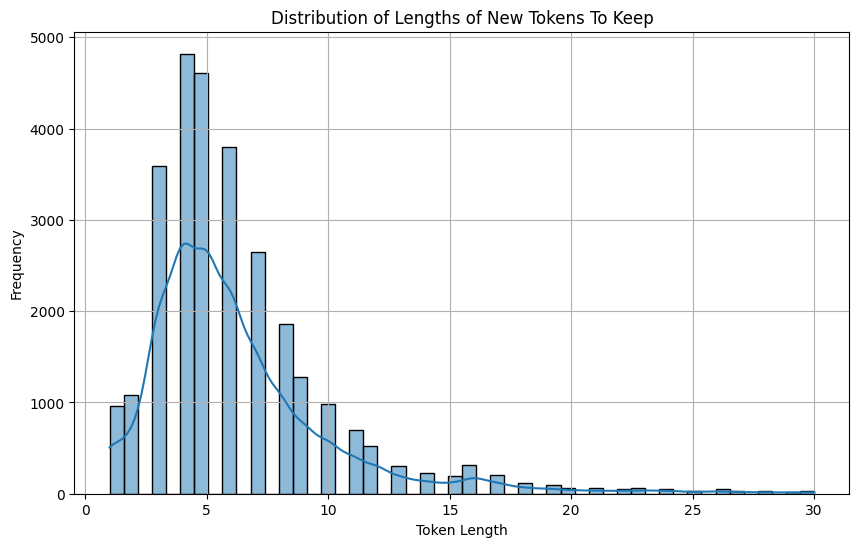

In [27]:
import matplotlib.pyplot as plt
# Plotting the frequencies of lengths of existing tokens
plt.figure(figsize=(10, 6))
sns.histplot(new_token_to_keep_len, bins=50, kde=True)
plt.title('Distribution of Lengths of New Tokens To Keep')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [28]:
# Convert the vocab keys to sets for efficient lookup
existing_tokens_set = set(current_tokenizer.vocab.keys())
new_tokens_to_keep_set = set(new_tokens_to_keep.keys())

# Find tokens in new_tokens_to_keep that are also in current_tokenizer.vocab
tokens_in_both = new_tokens_to_keep_set.intersection(existing_tokens_set)

# Find tokens in new_tokens_to_keep that are NOT in current_tokenizer.vocab
tokens_only_in_new = new_tokens_to_keep_set.difference(existing_tokens_set)

print(f"Tokens in new_tokens_to_keep that are in current_tokenizer.vocab: {len(tokens_in_both)}")
# print(tokens_in_both) # Uncomment to print the tokens themselves

print(f"Tokens in new_tokens_to_keep that are NOT in current_tokenizer.vocab: {len(tokens_only_in_new)}")
# print(tokens_only_in_new) # Uncomment to print the tokens themselves


Tokens in new_tokens_to_keep that are in current_tokenizer.vocab: 3511
Tokens in new_tokens_to_keep that are NOT in current_tokenizer.vocab: 25293


In [29]:
tokens_in_both

{'栗',
 'h',
 'rec',
 'عام',
 'عت',
 'ili',
 'جع',
 '⁸',
 'لا',
 'ليك',
 'som',
 'وجد',
 'gs',
 'ضا',
 '▁الخاص',
 'λ',
 'ah',
 'ao',
 'ド',
 'in',
 'ربع',
 'ci',
 'أي',
 '<unused_audio37>',
 '陸',
 'سپ',
 'ל',
 'cin',
 'usi',
 '▁النظام',
 '<unused_audio3>',
 'امل',
 '▁لوا',
 '▁الطب',
 'ür',
 'ting',
 'جموع',
 'ṯ',
 'طيب',
 '屋',
 '岡',
 'سمى',
 'ላ',
 'ⴹ',
 'al',
 'gol',
 'if',
 'chor',
 'lab',
 'لة',
 '<unused_audio59>',
 '▁مار',
 'صيل',
 'our',
 'mark',
 'ʻ',
 '<unused_image21>',
 'es',
 '▁السلط',
 'ⴳ',
 'ⵥ',
 '翼',
 'clos',
 'ju',
 'न',
 'ker',
 'كات',
 'ɲ',
 'ī',
 'كره',
 'بور',
 'fem',
 'jou',
 'ۇ',
 'F',
 'ha',
 '<unused_audio33>',
 'سيط',
 'بيت',
 '..',
 'ارج',
 '▁مصر',
 'feder',
 'صاف',
 '夕',
 'بع',
 '<unused_image15>',
 'د',
 'عب',
 'エ',
 'تع',
 'ی',
 '<unused_image84>',
 'ἄ',
 'tic',
 'み',
 '<unused_audio108>',
 '랙',
 'ὕ',
 'قتص',
 'هر',
 'ه',
 'كون',
 '대',
 '<unused_image77>',
 'ri',
 'iv',
 'nn',
 '吉',
 'انت',
 'Hi',
 'produ',
 'are',
 'vis',
 'اي',
 'آ',
 '▁المال',
 'ا',
 'oc',
 

In [30]:
type(tokens_only_in_new)

set

In [31]:
current_tokenizer.add_tokens(list(tokens_only_in_new))

25293

In [39]:
import os
import pickle

# Define your path
save_path = "../artifacts/tokenizer/new_tokens.pkl"

# Create directories if they don't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Now save your file
with open(save_path, 'wb') as f:
    pickle.dump(tokens_only_in_new, f)

In [32]:
print(len(tokens_only_in_new))

25293


In [33]:
existing_tokens = set(current_tokenizer.vocab.keys())
print(len(existing_tokens))

287693


In [34]:
text = dataset[30000]['text']

print(new_tokenizer.tokenize(text))
len(new_tokenizer.tokenize(text))


['ما▁هو▁ال', 'حد', '▁الأقص', 'ى', '▁لأ', 'طول▁', 'فترة▁', 'إق', 'راض', '▁م', 'تاح', 'ة▁ل', 'قرو', 'ض', 'ك▁؟']


15

In [35]:
tokenizer_save_path = "./darija_gemma_3n_tokenizer"
current_tokenizer.save_pretrained(tokenizer_save_path)
print(f"Tokenizer saved locally at: {tokenizer_save_path}")

Tokenizer saved locally at: ./darija_gemma_3n_tokenizer


In [36]:
# from huggingface_hub import HfApi

# # Set your repository ID (format: "username/repo_name")
# tokenizer_repo_id = "mohamed-stifi/darija_gemma_3n_tokenizer"  # Customize the repo name

# # Push to Hub
# current_tokenizer.push_to_hub(
#     repo_id=tokenizer_repo_id,
#     commit_message="Add Darija-adapted Gemma tokenizer from dataset mohamed-stifi/darija-combined-dataset",
# )
# print(f"✅ Tokenizer uploaded to: https://huggingface.co/{tokenizer_repo_id}")